# Dag profiel participanten: challenges

## importeren packages

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from datetime import timedelta
from matplotlib import pyplot as plt
import seaborn as sns
from tqdm import tqdm   #progressbar
tqdm.pandas()   #progressbar instantiëren voor pandas

C:\Users\fdnecker\AppData\Local\Continuum\anaconda3\lib\site-packages\tqdm\std.py:648: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


## importeren nodige datasets. 

Hier moeten jullie enkel jullie bestandsnaam en de locatie van het bestand op jouw computer veranderen. Je moet dus naar het bestand gaan dat je wil inlezen > eigenschappen > locatie neem je over, maar je verandert \ in / (+ .csv). 

In [2]:
appevent = "C:/Users/fdnecker/Desktop/191007_digimeter_appevents.csv"
session = "C:/Users/fdnecker/Desktop/191007_digimeter_sessions.csv"
notification = "C:/Users/fdnecker/Desktop/191007_digimeter_notifications.csv"

## Inlezen appevents dataset 

In [3]:
df_appevents= pd.read_csv(appevent, sep=";", parse_dates=['startTime', 'endTime'])

In [4]:
df_appevents.head()

,Unnamed: 0,application,battery,data_version,endTime,endTimeMillis,id,latitude,longitude,model,notification,session,startTime,startTimeMillis,studyKey,surveyId
0,0,com.google.android.gm,78.0,1.5,2019-10-04 18:23:54.901,1570206234901,7ef52060-a01d-40db-ad4e-5da0bfb52694,50.876431,4.713824,ONEPLUS A6013,True,1570206029,2019-10-04 18:23:34.901,1570206214901,Digimeter2019,26071994armama
1,1,com.instagram.android,75.0,1.5,2019-10-04 20:04:32.439,1570212272439,7ef52060-a01d-40db-ad4e-5da0bfb52694,50.877165,4.713351,ONEPLUS A6013,False,1570212078,2019-10-04 20:04:27.040,1570212267040,Digimeter2019,26071994armama
2,2,com.android.chrome,75.0,1.5,2019-10-04 20:08:04.041,1570212484041,7ef52060-a01d-40db-ad4e-5da0bfb52694,50.877165,4.713351,ONEPLUS A6013,False,1570212434,2019-10-04 20:07:19.029,1570212439029,Digimeter2019,26071994armama
3,3,com.google.android.keep,73.0,1.5,2019-10-04 20:21:08.867,1570213268867,7ef52060-a01d-40db-ad4e-5da0bfb52694,50.875349,4.716399,ONEPLUS A6013,False,1570213266,2019-10-04 20:21:07.970,1570213267970,Digimeter2019,26071994armama
4,4,com.twipemobile.standaard,72.0,1.5,2019-10-04 21:02:20.385,1570215740385,7ef52060-a01d-40db-ad4e-5da0bfb52694,50.877120,4.713232,ONEPLUS A6013,False,1570215735,2019-10-04 21:02:17.312,1570215737312,Digimeter2019,26071994armama


In [5]:
df_appevents.drop("Unnamed: 0", axis=1, inplace=True)
df_appevents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080850 entries, 0 to 1080849
Data columns (total 15 columns):
application        1080850 non-null object
battery            1080850 non-null float64
data_version       1080850 non-null float64
endTime            1080850 non-null datetime64[ns]
endTimeMillis      1080850 non-null int64
id                 1080850 non-null object
latitude           1080850 non-null float64
longitude          1080850 non-null float64
model              1080850 non-null object
notification       1080850 non-null bool
session            1080850 non-null int64
startTime          1080850 non-null datetime64[ns]
startTimeMillis    1080850 non-null int64
studyKey           1080850 non-null object
surveyId           1080850 non-null object
dtypes: bool(1), datetime64[ns](2), float64(4), int64(3), object(5)
memory usage: 116.5+ MB


## Drop duplicates

In [ ]:
pd.concat(g for _, g in df_appevents.groupby(["startTime","application","endTime"]) if len(g) > 1)

In [6]:
df = df_appevents.drop_duplicates(["startTime","application","endTime"])

In [7]:
df.head()

,application,battery,data_version,endTime,endTimeMillis,id,latitude,longitude,model,notification,session,startTime,startTimeMillis,studyKey,surveyId
0,com.google.android.gm,78.0,1.5,2019-10-04 18:23:54.901,1570206234901,7ef52060-a01d-40db-ad4e-5da0bfb52694,50.876431,4.713824,ONEPLUS A6013,True,1570206029,2019-10-04 18:23:34.901,1570206214901,Digimeter2019,26071994armama
1,com.instagram.android,75.0,1.5,2019-10-04 20:04:32.439,1570212272439,7ef52060-a01d-40db-ad4e-5da0bfb52694,50.877165,4.713351,ONEPLUS A6013,False,1570212078,2019-10-04 20:04:27.040,1570212267040,Digimeter2019,26071994armama
2,com.android.chrome,75.0,1.5,2019-10-04 20:08:04.041,1570212484041,7ef52060-a01d-40db-ad4e-5da0bfb52694,50.877165,4.713351,ONEPLUS A6013,False,1570212434,2019-10-04 20:07:19.029,1570212439029,Digimeter2019,26071994armama
3,com.google.android.keep,73.0,1.5,2019-10-04 20:21:08.867,1570213268867,7ef52060-a01d-40db-ad4e-5da0bfb52694,50.875349,4.716399,ONEPLUS A6013,False,1570213266,2019-10-04 20:21:07.970,1570213267970,Digimeter2019,26071994armama
4,com.twipemobile.standaard,72.0,1.5,2019-10-04 21:02:20.385,1570215740385,7ef52060-a01d-40db-ad4e-5da0bfb52694,50.877120,4.713232,ONEPLUS A6013,False,1570215735,2019-10-04 21:02:17.312,1570215737312,Digimeter2019,26071994armama


## 'datum' variabele maken (zonder tijdstip)

In [8]:
df['dag'] = df.startTime.dt.date

C:\Users\fdnecker\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## 'uur' variabele maken: nodig straks

In [9]:
df['uur'] = df.startTime.dt.hour

C:\Users\fdnecker\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## 'Duur' variabele maken

eindtijd appevent - starttijd appevent (in ms)

In [10]:
df['duur_ms'] = df['endTimeMillis'] -  df['startTimeMillis']

C:\Users\fdnecker\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
df['duur_s'] = df['duur_ms']/1000

C:\Users\fdnecker\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
df['duur_min'] = df['duur_s']/60

C:\Users\fdnecker\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
df['duur_min'].head()

0    0.333333
1    0.089983
2    0.750200
3    0.014950
4    0.051217
Name: duur_min, dtype: float64

## Uurblok variabele maken (obv 'uur' variabele komen tot 'uurblok', gelinkt met MobileDNA site classificatie)

In [63]:
def uurblok(row):
    if row['uur'] == 12:
        return '12u - 13u'
    if row['uur'] == 13:
        return '13u - 18u'
    if row['uur'] == 14:
        return '13u - 18u'
    if row['uur'] == 15:
        return '13u - 18u'
    if row['uur'] == 16:
        return '13u - 18u'
    if row['uur'] == 17:
        return '13u - 18u'
    if row['uur'] == 18:
        return '18u - 23u'
    if row['uur'] == 19:
        return '18u - 23u'
    if row['uur'] == 20:
        return '18u - 23u'
    if row['uur'] == 21:
        return '18u - 23u'
    if row['uur'] == 22:
        return '18u - 23u'
    if row['uur'] == 23:
        return '23u - 5u'
    if row['uur'] == 0:
        return '23u - 5u'
    if row['uur'] == 1:
        return '23u - 5u'
    if row['uur'] == 2:
        return '23u - 5u'
    if row['uur'] == 3:
        return '23u - 5u'
    if row['uur'] == 4:
        return '23u - 5u'
    if row['uur'] == 5:
        return '5u - 9u'
    if row['uur'] == 6:
        return '5u - 9u'
    if row['uur'] == 7:
        return '5u - 9u'
    if row['uur'] == 8:
        return '5u - 9u'
    if row['uur'] == 9:
        return '9u - 12u'
    if row['uur'] == 10:
        return '9u - 12u'
    if row['uur'] == 11:
        return '9u - 12u'


In [64]:
df['uurblok'] = df.apply(uurblok, axis=1)

C:\Users\fdnecker\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1060831 entries, 0 to 1080849
Data columns (total 21 columns):
application        1060831 non-null object
battery            1060831 non-null float64
data_version       1060831 non-null float64
endTime            1060831 non-null datetime64[ns]
endTimeMillis      1060831 non-null int64
id                 1060831 non-null object
latitude           1060831 non-null float64
longitude          1060831 non-null float64
model              1060831 non-null object
notification       1060831 non-null bool
session            1060831 non-null int64
startTime          1060831 non-null datetime64[ns]
startTimeMillis    1060831 non-null int64
studyKey           1060831 non-null object
surveyId           1060831 non-null object
dag                1060831 non-null object
uur                1060831 non-null int64
duur_ms            1060831 non-null int64
duur_s             1060831 non-null float64
duur_min           1060831 non-null float64
uurblok     

## Kolom met de datum aanmaken

In [31]:
df['datum'] = df['startTime'].dt.date

C:\Users\fdnecker\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## A Logdagen per participant 

In [80]:
logdagen = df.groupby('id')['datum'].value_counts()

In [81]:
logdagen = logdagen.to_frame()

In [82]:
logdagen

datum
id                                   datum            
003fb18e-d48c-4a9c-8e57-69b22a69759d 2019-08-28    253
                                     2019-09-21    245
                                     2019-09-08    233
                                     2019-09-11    196
                                     2019-09-07    194
...                                                ...
fd6362b0-1e6a-4ad9-a025-f3a5f840fd36 2019-09-23     59
                                     2019-10-01     58
                                     2019-09-09     43
                                     2019-09-15     39
                                     2019-10-02      2

[7130 rows x 1 columns]

In [83]:
logdagen = logdagen.rename(columns={'datum': 'aantal'})

In [84]:
logdagen = logdagen.reset_index()

In [85]:
logdagen

,id,datum,aantal
0,003fb18e-d48c-4a9c-8e57-69b22a69759d,2019-08-28,253
1,003fb18e-d48c-4a9c-8e57-69b22a69759d,2019-09-21,245
2,003fb18e-d48c-4a9c-8e57-69b22a69759d,2019-09-08,233
3,003fb18e-d48c-4a9c-8e57-69b22a69759d,2019-09-11,196
4,003fb18e-d48c-4a9c-8e57-69b22a69759d,2019-09-07,194
...,...,...,...
7125,fd6362b0-1e6a-4ad9-a025-f3a5f840fd36,2019-09-23,59
7126,fd6362b0-1e6a-4ad9-a025-f3a5f840fd36,2019-10-01,58
7127,fd6362b0-1e6a-4ad9-a025-f3a5f840fd36,2019-09-09,43
7128,fd6362b0-1e6a-4ad9-a025-f3a5f840fd36,2019-09-15,39


In [89]:
aantal_logdagen = logdagen['id'].value_counts()

## id's van de participanten waarbij aantal logdagen <= 2 zoeken

In [90]:
kl2_log = aantal_logdagen[aantal_logdagen <= 2]

In [92]:
kl2_log = kl2_log.to_frame()

In [95]:
kl2_log = kl2_log.reset_index()

In [99]:
kl2_log = kl2_log.rename(columns = {'index': 'id', 'id': 'logdays'})

In [101]:
kl2_log

,id,logdays
0,bfcd58ed-b0f6-4690-a64a-960af06871b0,2
1,f9ccfdc5-3adc-4484-8758-e8c7c57d1ac6,2
2,ced26305-541a-4291-9029-f039a3a75e38,2
3,aa531c7b-642a-46db-98e0-920c431fbc11,2
4,df0fa92d-510d-4cf0-8b7a-b3ac367d204b,2
5,3336915f-92e5-4059-bf20-b875c5376a05,2
6,878eab40-2ce6-4da7-aca6-f99c8f94c6b8,2
7,0b0665e3-7c69-46fb-a8ee-382523bc37df,2
8,51c5eaee-2990-4910-abde-b7d1afffe640,2
9,51a7e8e7-c05c-492e-82ac-bc971fb1cc25,2


In [103]:
kl2_log.id

0     bfcd58ed-b0f6-4690-a64a-960af06871b0
1     f9ccfdc5-3adc-4484-8758-e8c7c57d1ac6
2     ced26305-541a-4291-9029-f039a3a75e38
3     aa531c7b-642a-46db-98e0-920c431fbc11
4     df0fa92d-510d-4cf0-8b7a-b3ac367d204b
5     3336915f-92e5-4059-bf20-b875c5376a05
6     878eab40-2ce6-4da7-aca6-f99c8f94c6b8
7     0b0665e3-7c69-46fb-a8ee-382523bc37df
8     51c5eaee-2990-4910-abde-b7d1afffe640
9     51a7e8e7-c05c-492e-82ac-bc971fb1cc25
10    f5f2a8c6-cb78-47fc-a1d9-d2043c9c9b19
11    8a7f17d6-9d43-49b4-8a15-59e686288c36
12    6b2b93bc-d20d-4672-b5a5-7e1efbde8688
13    da9c28a5-64b8-489e-ac56-200f2e724eaa
14    e4e59f41-2865-49f3-a80e-6055e43467b3
15    4de8aacd-647a-4c69-a1eb-6a0287d49c5e
16    04e97600-7fea-454d-b5cc-b407497d408a
17    df939a31-74f5-476d-9cca-d7e987a2e86e
18    ba6b1702-8101-419f-95b5-40fdef523685
19    1269baaa-b9d9-4744-8417-5848d414177b
20    35f9114f-b79d-48dd-b7ad-e10ba2f37815
21    a56018d8-ff9c-4dbc-ab7a-1f7801fa90b1
22    6d298ab4-2d8f-4caa-a649-09364f256c0d
Name: id, d

## Participant met < 3 logdagen verwijderen 

In [ ]:
df [(!(df$A=="no") & !(df$A=="unknown")),]

In [106]:
goed_log = df[(df.id != 'bfcd58ed-b0f6-4690-a64a-960af06871b0') & (df.id != 'f9ccfdc5-3adc-4484-8758-e8c7c57d1ac6') & (df.id != 'ced26305-541a-4291-9029-f039a3a75e38') &
               (df.id != 'aa531c7b-642a-46db-98e0-920c431fbc11') & (df.id != 'df0fa92d-510d-4cf0-8b7a-b3ac367d204b') & (df.id != '3336915f-92e5-4059-bf20-b875c5376a05') & 
               (df.id != '878eab40-2ce6-4da7-aca6-f99c8f94c6b8') & (df.id != '0b0665e3-7c69-46fb-a8ee-382523bc37df') & (df.id != '51c5eaee-2990-4910-abde-b7d1afffe640') &
               (df.id != '51a7e8e7-c05c-492e-82ac-bc971fb1cc25') & (df.id != 'f5f2a8c6-cb78-47fc-a1d9-d2043c9c9b19') & (df.id != '8a7f17d6-9d43-49b4-8a15-59e686288c36') &
               (df.id != '6b2b93bc-d20d-4672-b5a5-7e1efbde8688') & (df.id != 'da9c28a5-64b8-489e-ac56-200f2e724eaa') & (df.id != 'e4e59f41-2865-49f3-a80e-6055e43467b3') &
               (df.id != '4de8aacd-647a-4c69-a1eb-6a0287d49c5e') & (df.id != '04e97600-7fea-454d-b5cc-b407497d408a') & (df.id != 'df939a31-74f5-476d-9cca-d7e987a2e86e') & 
               (df.id != 'ba6b1702-8101-419f-95b5-40fdef523685') & (df.id != '1269baaa-b9d9-4744-8417-5848d414177b') & (df.id != '35f9114f-b79d-48dd-b7ad-e10ba2f37815') &
               (df.id != 'a56018d8-ff9c-4dbc-ab7a-1f7801fa90b1') & (df.id != '6d298ab4-2d8f-4caa-a649-09364f256c0d')]
            
               

In [108]:
goed_log.head()

,application,battery,data_version,endTime,endTimeMillis,id,latitude,longitude,model,notification,...,startTimeMillis,studyKey,surveyId,dag,uur,duur_ms,duur_s,duur_min,uurblok,datum
0,com.google.android.gm,78.0,1.5,2019-10-04 18:23:54.901,1570206234901,7ef52060-a01d-40db-ad4e-5da0bfb52694,50.876431,4.713824,ONEPLUS A6013,True,...,1570206214901,Digimeter2019,26071994armama,2019-10-04,18,20000,20.000,0.333333,18u - 23u,2019-10-04
1,com.instagram.android,75.0,1.5,2019-10-04 20:04:32.439,1570212272439,7ef52060-a01d-40db-ad4e-5da0bfb52694,50.877165,4.713351,ONEPLUS A6013,False,...,1570212267040,Digimeter2019,26071994armama,2019-10-04,20,5399,5.399,0.089983,18u - 23u,2019-10-04
2,com.android.chrome,75.0,1.5,2019-10-04 20:08:04.041,1570212484041,7ef52060-a01d-40db-ad4e-5da0bfb52694,50.877165,4.713351,ONEPLUS A6013,False,...,1570212439029,Digimeter2019,26071994armama,2019-10-04,20,45012,45.012,0.750200,18u - 23u,2019-10-04
3,com.google.android.keep,73.0,1.5,2019-10-04 20:21:08.867,1570213268867,7ef52060-a01d-40db-ad4e-5da0bfb52694,50.875349,4.716399,ONEPLUS A6013,False,...,1570213267970,Digimeter2019,26071994armama,2019-10-04,20,897,0.897,0.014950,18u - 23u,2019-10-04
4,com.twipemobile.standaard,72.0,1.5,2019-10-04 21:02:20.385,1570215740385,7ef52060-a01d-40db-ad4e-5da0bfb52694,50.877120,4.713232,ONEPLUS A6013,False,...,1570215737312,Digimeter2019,26071994armama,2019-10-04,21,3073,3.073,0.051217,18u - 23u,2019-10-04


## Algemeen

### Gemiddelde duur van gebruik van de participant

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1060831 entries, 0 to 1080849
Data columns (total 22 columns):
application        1060831 non-null object
battery            1060831 non-null float64
data_version       1060831 non-null float64
endTime            1060831 non-null datetime64[ns]
endTimeMillis      1060831 non-null int64
id                 1060831 non-null object
latitude           1060831 non-null float64
longitude          1060831 non-null float64
model              1060831 non-null object
notification       1060831 non-null bool
session            1060831 non-null int64
startTime          1060831 non-null datetime64[ns]
startTimeMillis    1060831 non-null int64
studyKey           1060831 non-null object
surveyId           1060831 non-null object
dag                1060831 non-null object
uur                1060831 non-null int64
duur_ms            1060831 non-null int64
duur_s             1060831 non-null float64
duur_min           1060831 non-null float64
uurblok     

In [110]:
gem_duur = df.groupby(['id', 'datum'])['duur_min'].sum()

In [111]:
av_use = gem_duur.groupby('id').mean()

In [112]:
av_use = av_use.to_frame().reset_index()

In [113]:
av_use

,id,duur_min
0,003fb18e-d48c-4a9c-8e57-69b22a69759d,164.841258
1,008e3629-99b2-4f5a-a574-fba318a0089f,60.293028
2,01767dff-b4f0-4417-9256-12afae6115b8,227.808803
3,02b80ae5-d955-40a1-8214-8f38362a4971,130.762353
4,03572528-bc5d-46fe-b4ae-766d0fc4a8af,103.433919
...,...,...
319,faae2790-d6ac-4159-a5c3-fbdfd6531d83,202.979397
320,fb2ba7df-c9f6-4db8-8d87-d88cde34c1e2,119.242345
321,fb592dfb-0dba-48d7-978a-b9b27f05ae19,392.777430
322,fd59cefd-6d2f-48da-bb02-d35d6e0c89a6,282.003590


In [114]:
av_use.describe()

,duur_min
count,324.000000
mean,140.812878
std,97.453912
min,2.836017
25%,73.080820
50%,120.438594
75%,187.351652
max,535.805168


Zo kan je dus in het algemeen al weten of dat iemand veel of weinig smartphone gebruik vertoond. <br>
Ook visualisatie (nu niet betekenisvol, want téveel data), maar met jullie participanten zal dat wel betekenisvol zijn. 


doe de # voor de code weg, indien je deze wil runnen. nu achter slot gezet (#) omdat het nu toch niet betekenisvol is. 

In [ ]:
#sns.catplot(x = 'id', y = 'duur_min', kind = 'bar', palette = 'muted', data=av_use)

### Proportie van gemiddeld smartphonegebruik (appevents) over dag per uur

Doet er niet toe welke kolom je hier kiest, want alle lijnen wijzen op een appevent. 

In [115]:
appE = df.groupby('uur').count()

In [116]:
appE = appE['application']

In [117]:
appE = appE.to_frame()

In [121]:
app_E = appE.reset_index()

In [124]:
app_E = app_E.rename(columns={'application': 'A_appE'})

In [125]:
total_appE = app_E['A_appE'].sum()

In [126]:
app_E['prop_appE'] = app_E['A_appE']/total_appE

In [127]:
app_E

,uur,A_appE,prop_appE
0,0,17605,0.016595
1,1,7874,0.007422
2,2,4276,0.004031
3,3,2826,0.002664
4,4,2191,0.002065
5,5,4481,0.004224
6,6,16742,0.015782
7,7,39316,0.037062
8,8,50490,0.047595
9,9,53837,0.050750


#### histogram

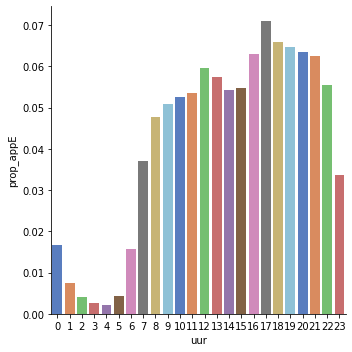

In [128]:
sns.catplot(x = 'uur', y = 'prop_appE', kind = 'bar', palette = 'muted', data=app_E)

Dit is nu algemeen, maar dit kan je eigenlijk ook voor elke participant maken. Als je dan een vergelijking wil van de verschillende participanten: makkelijk via heatmap. Wil je echt op het level van een participant kijken, bvb. voor specifieke pieken van iemand te bekijken (en niet verward te zijn van een heatmap) is het interessanter om op de specifieke data van een participant een heatmap te maken. 

Specifieke data van een participant selecteren doe je door: 

In [130]:
participant1 = df[df['id'] ==  '003fb18e-d48c-4a9c-8e57-69b22a69759d']

Daar kunnen dan gelijkaardige dingen mee worden gedaan (zie verder).

### Proportie van gemiddeld smartphonegebruik (appevents) over dag per uurblok

In [134]:
appE = df.groupby('uurblok').count()

In [135]:
appE = appE['application']

In [136]:
appE = appE.to_frame()

In [137]:
app_E = appE.reset_index()

In [138]:
app_E = app_E.rename(columns={'application': 'A_appE'})

In [139]:
total_appE = app_E['A_appE'].sum()

In [140]:
app_E['prop_appE'] = app_E['A_appE']/total_appE

In [141]:
app_E

,uurblok,A_appE,prop_appE
0,12u - 13u,63305,0.059675
1,13u - 18u,318666,0.300393
2,18u - 23u,330852,0.311880
3,23u - 5u,70534,0.066489
4,5u - 9u,111029,0.104662
5,9u - 12u,166445,0.156901


#### histogram

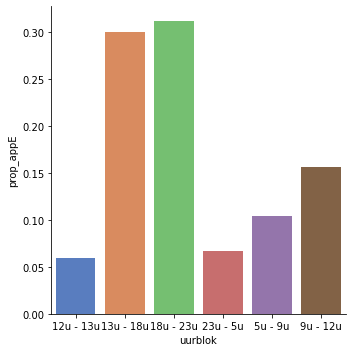

In [142]:
sns.catplot(x = 'uurblok', y = 'prop_appE', kind = 'bar', palette = 'muted', data=app_E)

### top 3 gebruikte applicaties per uur

In [146]:
app_uur = df.groupby(['uur', 'application']).count()

In [147]:
app_uur = app_uur['battery']

In [149]:
app_uur = app_uur.to_frame()

In [152]:
app_uur

battery
uur application                                        
0   MyING.be                                         17
    Orion.Soft                                        6
    air.com.bartbonte.black                           1
    air.com.midjiwan.polytopia                        2
    air.com.sgn.cookiejam.gp                         23
...                                                 ...
23  vex.android                                      11
    vibratoreforgirls.hightool.com.vibratorpro        1
    video.like                                        2
    yqtrack.app                                       5
    zte.android.flashlight                            9

[22664 rows x 1 columns]

In [162]:
app_uur_3 = app_uur.groupby('uur')['battery'].nlargest(3)

In [163]:
app_uur_3

uur  uur  application        
0    0    com.facebook.katana    1374
          com.android.chrome     1294
          com.whatsapp           1174
1    1    com.facebook.katana     629
          com.whatsapp            494
                                 ... 
22   22   com.facebook.katana    4680
          com.android.chrome     4611
23   23   com.facebook.katana    3011
          com.whatsapp           2971
          com.android.chrome     2800
Name: battery, Length: 72, dtype: int64

In [165]:
app_uur_3= app_uur_3.to_frame()

### top 3 gebruikte applicaties per uurblok (MobileDNA)

In [175]:
app_uurblok = df.groupby(['uurblok', 'application']).count()

In [176]:
app_uurblok = app_uurblok['battery']

In [177]:
app_uurblok = app_uurblok.to_frame()

In [179]:
app_uurblok

battery
uurblok   application                                                
12u - 13u MyING.be                                                 72
          Orion.Soft                                                1
          absworkout.abchallenge.waistworkout.fatburningw...        1
          ai.photo.editor.video.collage                             1
          air.com.midjiwan.polytopia                               10
...                                                               ...
9u - 12u  vivino.web.app                                            6
          watch.dynamic.dwcompanion                                 1
          wp.wattpad                                                1
          yqtrack.app                                              30
          zte.android.flashlight                                    2

[9789 rows x 1 columns]

In [181]:
app_uurblok_3 = app_uurblok.groupby('uurblok')['battery'].nlargest(3)

In [183]:
app_uurblok_3= app_uurblok_3.to_frame()

In [184]:
app_uurblok_3

battery
uurblok   uurblok   application                 
12u - 13u 12u - 13u com.whatsapp            6592
                    com.facebook.katana     4595
                    com.android.chrome      4391
13u - 18u 13u - 18u com.whatsapp           33158
                    com.android.chrome     21469
                    com.facebook.katana    20153
18u - 23u 18u - 23u com.whatsapp           36915
                    com.android.chrome     25816
                    com.facebook.katana    24210
23u - 5u  23u - 5u  com.facebook.katana     5589
                    com.whatsapp            5243
                    com.android.chrome      5045
5u - 9u   5u - 9u   com.whatsapp            8861
                    com.android.chrome      8808
                    com.facebook.katana     7393
9u - 12u  9u - 12u  com.whatsapp           17379
                    com.android.chrome     11966
                    com.facebook.katana    11455

## Per persoon 

Zie instructies hierboven om tot specifieke profielen te komen. 

### Proportie van gemiddeld smartphonegebruik over dag per uur

In [185]:
data_alg_heatmap = pd.crosstab(df.uur, df.id, normalize = 'columns')

In [186]:
data_alg_heatmap

id,003fb18e-d48c-4a9c-8e57-69b22a69759d,008e3629-99b2-4f5a-a574-fba318a0089f,01767dff-b4f0-4417-9256-12afae6115b8,02b80ae5-d955-40a1-8214-8f38362a4971,03572528-bc5d-46fe-b4ae-766d0fc4a8af,04e97600-7fea-454d-b5cc-b407497d408a,05409a82-51ea-4e19-a76f-da40cb2be6c7,07ba04f9-433c-47a8-baf5-1a4bbff4a165,093c490a-8561-4cef-898e-1b4c3a913152,09dfb425-9beb-4b1f-bca7-45507f0d28a7,...,f899a165-7e2c-42f3-a6fc-ca3da300ab8a,f8cc9eff-0bb6-4ac1-bfc8-fd86abe8bb62,f8e94764-28ef-4af2-9438-54d0ea1205cd,f9b5a881-2921-4b00-8f11-d960d9bb8e6a,f9ccfdc5-3adc-4484-8758-e8c7c57d1ac6,faae2790-d6ac-4159-a5c3-fbdfd6531d83,fb2ba7df-c9f6-4db8-8d87-d88cde34c1e2,fb592dfb-0dba-48d7-978a-b9b27f05ae19,fd59cefd-6d2f-48da-bb02-d35d6e0c89a6,fd6362b0-1e6a-4ad9-a025-f3a5f840fd36
uur,,,,,,,,,,,,,,,,,,,,,
0,0.004738,0.000000,0.089041,0.038514,0.009724,0.000000,0.000000,0.005345,0.000000,0.000000,...,0.004331,0.001940,0.000000,0.008667,0.113636,0.025242,0.003452,0.054805,0.077098,0.044842
1,0.000364,0.000000,0.014321,0.060523,0.004862,0.000000,0.003229,0.008284,0.000000,0.000000,...,0.002707,0.007439,0.000000,0.011376,0.062500,0.005099,0.009590,0.015068,0.047997,0.007417
2,0.000364,0.000000,0.000000,0.012380,0.000000,0.000000,0.007380,0.001336,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.016793,0.000000,0.000000,0.000000,0.001405,0.068783,0.004046
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013838,0.001336,0.000000,0.000000,...,0.004873,0.000000,0.000000,0.008667,0.000000,0.000000,0.000000,0.000000,0.046863,0.001686
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005074,0.001871,0.000000,0.000000,...,0.000541,0.000000,0.002352,0.008126,0.000000,0.000000,0.000000,0.000000,0.006047,0.000000
5,0.000729,0.000000,0.000000,0.000000,0.000000,0.000000,0.009686,0.000534,0.000000,0.000000,...,0.054142,0.000000,0.007578,0.004334,0.000000,0.004844,0.000000,0.000000,0.009448,0.001686
6,0.007837,0.000000,0.000000,0.000000,0.000000,0.000000,0.011070,0.003207,0.000000,0.005682,...,0.066594,0.000000,0.059315,0.035753,0.000000,0.005354,0.018796,0.003904,0.026455,0.000337
7,0.052670,0.000000,0.006849,0.000000,0.011345,0.000000,0.028598,0.035275,0.108696,0.055398,...,0.087168,0.009056,0.070290,0.052546,0.005682,0.003060,0.044879,0.021469,0.041194,0.007080
8,0.053217,0.000000,0.041719,0.015131,0.043760,0.000000,0.057196,0.035008,0.081522,0.029119,...,0.031402,0.038163,0.038934,0.050921,0.005682,0.013259,0.081703,0.009446,0.050265,0.027310


#### heatmap

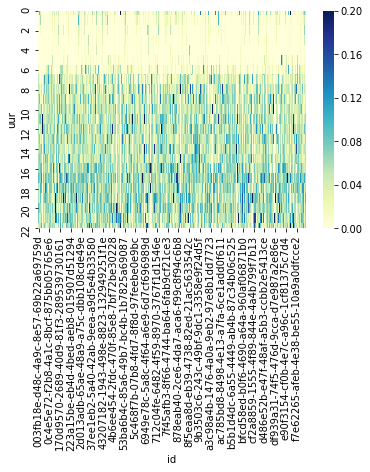

In [187]:
sns.heatmap(data_alg_heatmap, cmap='YlGnBu', vmin = 0, vmax = 0.2)

### Proportie van gemiddeld smartphonegebruik over dag per uur

In [188]:
data_ub_heatmap = pd.crosstab(df.uurblok, df.id, normalize = 'columns')

In [189]:
data_ub_heatmap

id,003fb18e-d48c-4a9c-8e57-69b22a69759d,008e3629-99b2-4f5a-a574-fba318a0089f,01767dff-b4f0-4417-9256-12afae6115b8,02b80ae5-d955-40a1-8214-8f38362a4971,03572528-bc5d-46fe-b4ae-766d0fc4a8af,04e97600-7fea-454d-b5cc-b407497d408a,05409a82-51ea-4e19-a76f-da40cb2be6c7,07ba04f9-433c-47a8-baf5-1a4bbff4a165,093c490a-8561-4cef-898e-1b4c3a913152,09dfb425-9beb-4b1f-bca7-45507f0d28a7,...,f899a165-7e2c-42f3-a6fc-ca3da300ab8a,f8cc9eff-0bb6-4ac1-bfc8-fd86abe8bb62,f8e94764-28ef-4af2-9438-54d0ea1205cd,f9b5a881-2921-4b00-8f11-d960d9bb8e6a,f9ccfdc5-3adc-4484-8758-e8c7c57d1ac6,faae2790-d6ac-4159-a5c3-fbdfd6531d83,fb2ba7df-c9f6-4db8-8d87-d88cde34c1e2,fb592dfb-0dba-48d7-978a-b9b27f05ae19,fd59cefd-6d2f-48da-bb02-d35d6e0c89a6,fd6362b0-1e6a-4ad9-a025-f3a5f840fd36
uurblok,,,,,,,,,,,,,,,,,,,,,
12u - 13u,0.061782,0.011407,0.021793,0.045392,0.043760,0.777778,0.051199,0.075094,0.070652,0.036222,...,0.059556,0.056598,0.069767,0.046046,0.028409,0.057624,0.042578,0.036771,0.085790,0.059339
13u - 18u,0.314379,0.524715,0.341843,0.292985,0.377634,0.000000,0.302583,0.335649,0.333333,0.318182,...,0.308067,0.398448,0.280376,0.342362,0.465909,0.338348,0.220944,0.214537,0.258503,0.283547
18u - 23u,0.324221,0.311787,0.225405,0.332875,0.316045,0.000000,0.317804,0.289685,0.265399,0.413352,...,0.263129,0.297219,0.292919,0.241603,0.261364,0.326364,0.401995,0.511515,0.150794,0.358395
23u - 5u,0.019501,0.003802,0.158157,0.173315,0.056726,0.000000,0.051661,0.045697,0.014493,0.019886,...,0.014077,0.024256,0.014894,0.081798,0.193182,0.067823,0.059839,0.151846,0.291005,0.120701
5u - 9u,0.114452,0.000000,0.048568,0.015131,0.055105,0.000000,0.106550,0.074025,0.190217,0.090199,...,0.239307,0.047219,0.176117,0.143554,0.011364,0.026517,0.145378,0.034819,0.127362,0.036413
9u - 12u,0.165664,0.148289,0.204234,0.140303,0.150729,0.222222,0.170203,0.179850,0.125906,0.122159,...,0.115864,0.176261,0.165926,0.144637,0.039773,0.183325,0.129267,0.050511,0.086546,0.141605


#### heatmap

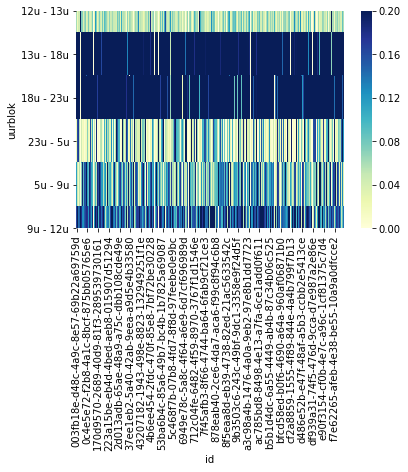

In [190]:
sns.heatmap(data_ub_heatmap, cmap='YlGnBu', vmin = 0, vmax = 0.2)

### top 3 gebruikte applicaties per uur

In [191]:
app_uur_id = df.groupby(['id','uur', 'application']).count()

In [192]:
app_uur_id = app_uur_id['battery']

In [193]:
app_uur_id = app_uur_id.to_frame()

In [194]:
app_uur_id

battery
id                                   uur application                                
003fb18e-d48c-4a9c-8e57-69b22a69759d 0   be.persgroep.android.news.mobiledm        1
                                         com.android.chrome                        1
                                         com.google.android.apps.maps              3
                                         com.laurencedawson.reddit_sync           10
                                         com.netflix.mediaclient                   1
...                                                                              ...
fd6362b0-1e6a-4ad9-a025-f3a5f840fd36 23  com.sofascore.results                     1
                                         com.spotify.music                         8
                                         com.waze                                 13
                                         com.whatsapp                             21
                                         mobi.lockdown.weather                    11

[119413 rows x 1 columns]

In [196]:
app_uur_id_3 = app_uur_id.groupby(['id','uur'])['battery'].nlargest(3)

In [197]:
app_uur_id_3

id                                    uur  id                                    uur  application                   
003fb18e-d48c-4a9c-8e57-69b22a69759d  0    003fb18e-d48c-4a9c-8e57-69b22a69759d  0    com.laurencedawson.reddit_sync    10
                                                                                      com.google.android.apps.maps       3
                                                                                      com.ninefolders.hd3                3
                                      1    003fb18e-d48c-4a9c-8e57-69b22a69759d  1    com.laurencedawson.reddit_sync     1
                                                                                      com.netflix.mediaclient            1
                                                                                                                        ..
fd6362b0-1e6a-4ad9-a025-f3a5f840fd36  22   fd6362b0-1e6a-4ad9-a025-f3a5f840fd36  22   com.waze                          29
                      

In [199]:
app_uur_id_3= app_uur_id_3.to_frame()

In [200]:
app_uur_id_3

battery
id                                   uur id                                   uur application                            
003fb18e-d48c-4a9c-8e57-69b22a69759d 0   003fb18e-d48c-4a9c-8e57-69b22a69759d 0   com.laurencedawson.reddit_sync       10
                                                                                  com.google.android.apps.maps          3
                                                                                  com.ninefolders.hd3                   3
                                     1   003fb18e-d48c-4a9c-8e57-69b22a69759d 1   com.laurencedawson.reddit_sync        1
                                                                                  com.netflix.mediaclient               1
...                                                                                                                   ...
fd6362b0-1e6a-4ad9-a025-f3a5f840fd36 22  fd6362b0-1e6a-4ad9-a025-f3a5f840fd36 22  com.waze                             29
                                                                                  com.facebook.orca                    23
                                     23  fd6362b0-1e6a-4ad9-a025-f3a5f840fd36 23  com.facebook.orca                    23
                                                                                  com.whatsapp                         21
                                                                                  com.facebook.katana                  14

[18495 rows x 1 columns]

Niet super betekenisvol. Nog eens nadenken hoe we dit betekenisvoller krijgen, maar hier ook met heel veel data, dus bij jullie zal dat beter meevallen normaal.

### top 3 gebruikte applicaties per uurblok (MobileDNA)

In [201]:
app_uurblok_id = df.groupby(['id','uurblok', 'application']).count()

In [202]:
app_uurblok_id = app_uurblok_id['battery']

In [203]:
app_uurblok_id = app_uurblok_id.to_frame()

In [204]:
app_uurblok_id

battery
id                                   uurblok   application                               
003fb18e-d48c-4a9c-8e57-69b22a69759d 12u - 13u android                                  4
                                               app.homehabit.view                       1
                                               be.vlaanderen.fietsland                  2
                                               com.Slack                               19
                                               com.amazon.mShop.android.shopping        1
...                                                                                   ...
fd6362b0-1e6a-4ad9-a025-f3a5f840fd36 9u - 12u  com.spotify.music                        2
                                               com.waze                                21
                                               com.whatsapp                            84
                                               me.mealhero.app                          2
                                               mobi.lockdown.weather                    8

[56151 rows x 1 columns]

In [205]:
app_uurblok_id_3 = app_uurblok_id.groupby(['id','uurblok'])['battery'].nlargest(3)

In [206]:
app_uurblok_id_3

id                                    uurblok    id                                    uurblok    application                   
003fb18e-d48c-4a9c-8e57-69b22a69759d  12u - 13u  003fb18e-d48c-4a9c-8e57-69b22a69759d  12u - 13u  com.laurencedawson.reddit_sync     41
                                                                                                  com.whatsapp                       31
                                                                                                  com.android.chrome                 30
                                      13u - 18u  003fb18e-d48c-4a9c-8e57-69b22a69759d  13u - 18u  com.android.chrome                230
                                                                                                  com.laurencedawson.reddit_sync    144
                                                                                                                                   ... 
fd6362b0-1e6a-4ad9-a025-f3a5f840fd36  5u - 9u    fd6362

In [207]:
app_uurblok_id_3= app_uurblok_id_3.to_frame()

In [208]:
app_uurblok_id_3

battery
id                                   uurblok   id                                   uurblok   application                            
003fb18e-d48c-4a9c-8e57-69b22a69759d 12u - 13u 003fb18e-d48c-4a9c-8e57-69b22a69759d 12u - 13u com.laurencedawson.reddit_sync       41
                                                                                              com.whatsapp                         31
                                                                                              com.android.chrome                   30
                                     13u - 18u 003fb18e-d48c-4a9c-8e57-69b22a69759d 13u - 18u com.android.chrome                  230
                                                                                              com.laurencedawson.reddit_sync      144
...                                                                                                                               ...
fd6362b0-1e6a-4ad9-a025-f3a5f840fd36 5u - 9u   fd6362b0-1e6a-4ad9-a025-f3a5f840fd36 5u - 9u   com.ingyomate.shakeit                27
                                                                                              com.microsoft.office.outlook         14
                                     9u - 12u  fd6362b0-1e6a-4ad9-a025-f3a5f840fd36 9u - 12u  com.whatsapp                         84
                                                                                              com.google.android.dialer            37
                                                                                              com.facebook.orca                    32

[5533 rows x 1 columns]

## Per steekproefsegment

Eerst de participanten in segmenten steken. Daarna ga je dezelfde stappen als hierboven herhalen met die specifieke dataset van participanten per segment. 

### Proportie van gemiddeld smartphonegebruik over dag per uur

#### heatmap

### top 3 gebruikte applicaties per uur

#### heatmap

### top 3 gebruikte applicaties per uurblok (MobileDNA)

#### histogram

### top 3 gebruikte applicaties per uur

#### histogram